In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
#ml stuff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn import ensemble

from sklearn.decomposition import PCA

#metrics
from sklearn.metrics import mean_squared_error


predictors = pd.read_csv('predictors.csv')
labels = pd.read_csv('labels.csv')

## loading datasets 

In [ ]:
predictors = pd.read_csv('predictors.csv')
labels = pd.read_csv('labels.csv')

## Basic Analysis 

Shape of labels : (507, 2)
Shape of predictors : (322109, 88)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 2 columns):
timestamp    507 non-null float64
label        507 non-null float64
dtypes: float64(2)
memory usage: 8.0 KB
datatype info of labels: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322109 entries, 0 to 322108
Data columns (total 88 columns):
timestamp    322109 non-null float64
f0           146267 non-null float64
f1           138481 non-null float64
f2           322044 non-null float64
f3           322044 non-null float64
f4           309409 non-null float64
f5           317230 non-null float64
f6           320224 non-null float64
f7           19421 non-null float64
f8           315667 non-null float64
f9           320605 non-null float64
f10          101187 non-null float64
f11          322044 non-null float64
f12          309417 non-null float64
f13          322040 non-null float64
f14          322033 non-null fl

,timestamp,f0,f1,f2,f3,f4,f5,f6,f8,f9,...,f76,f78,f79,f80,f81,f82,f84,f85,f86,label
0,1.368599e+09,0.204069,-0.069087,-0.865418,0.897000,0.881606,0.409024,-0.292274,-0.023698,0.487608,...,-1.439707,-0.202152,-0.508738,-1.447563,-1.201004,-0.982621,-0.860921,-0.411319,-0.002696,49.744664
1,1.369204e+09,0.204069,-0.069087,0.400160,-0.696550,0.847983,0.145724,-0.303200,-0.023698,0.022198,...,-0.625287,0.098538,-0.161381,-0.513902,-1.196386,-0.192965,-0.984022,-0.411319,-0.002696,52.428068
2,1.369809e+09,0.204069,-0.069087,0.421598,0.203181,0.839021,0.284300,-0.205212,-0.020951,-1.546372,...,-0.527593,0.313478,0.123193,-0.375179,-1.191769,0.262066,-0.968784,-0.411319,-0.002696,67.154640
3,1.370414e+09,0.204069,-0.069087,0.437323,-0.268837,0.825693,0.249133,-0.305601,-0.011460,0.411510,...,-0.684908,0.396439,0.414191,-0.695233,-1.187151,-0.699682,-1.063894,-0.411319,-0.002696,40.521581
4,1.371019e+09,0.204069,-0.069087,0.419768,1.708143,0.863245,0.233679,-0.431043,-0.026574,0.467601,...,-0.338620,0.671892,0.711413,-1.781468,-1.182534,0.312800,-1.104688,-0.411319,-0.002696,63.614351


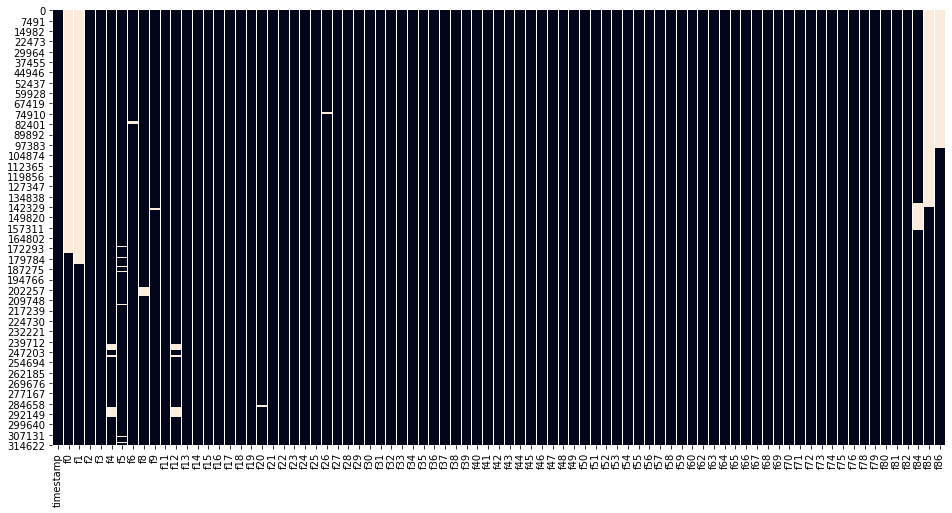

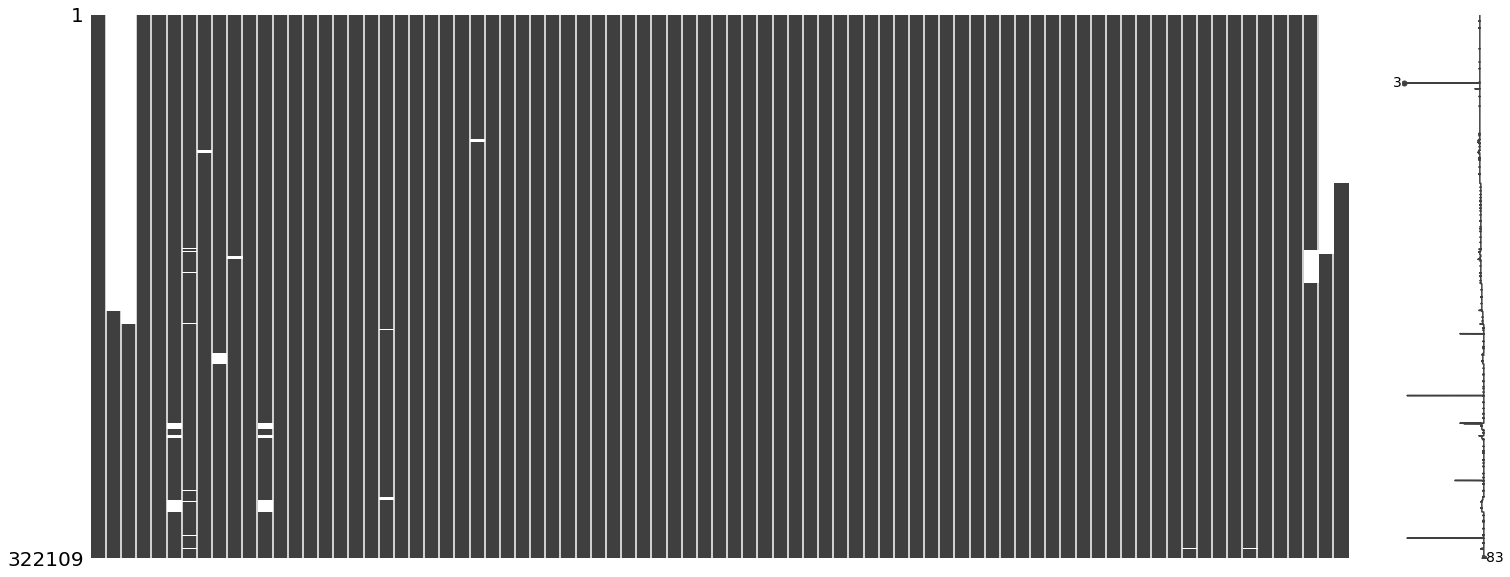

In [ ]:
# 1. Basic analysis
print("Shape of labels :", labels.shape)
print("Shape of predictors :", predictors.shape)
print("datatype info of labels:",labels.info())
print("column info of predictiors", predictors.info())

#2. checking nulls in the data and removing those columns
print(" \ntotal nulls in labels dataset : ", labels.isnull().sum())

print('\nMax nulls as percentage of total length in predictors dataset : ', (predictors.isnull().sum()/(predictors.shape[0]*1.0)).max()*100)


# 3. Cleaning dataset i.e. removing all columns which have more than 30% nulls 
# Remove columns with more than 30% NA
cleandata=predictors.drop(["f7","f10","f61","f77","f83"],axis=1)
plt.figure(figsize=(16,8))
sns.heatmap(cleandata.isnull(),cbar=False)
msno.matrix(cleandata)
# 4. Replacing nulls in columns with median values
cleandata.fillna(cleandata.median(),inplace=True)
print(cleandata.isnull().sum()*100/len(cleandata))

# 5. scaling input dataset to have similar range values i.e. some of the columns have very large values, so scaling them down using StandardScaler
scaler = StandardScaler() #creating scaler object
cleandata.loc[:, cleandata.columns != 'timestamp'] = scaler.fit_transform(cleandata.loc[:,cleandata.columns != 'timestamp'])

#joing predictors dataset with labels on timestamp key
feature_dataset = cleandata.merge(labels, on=['timestamp'])
feature_dataset.head()

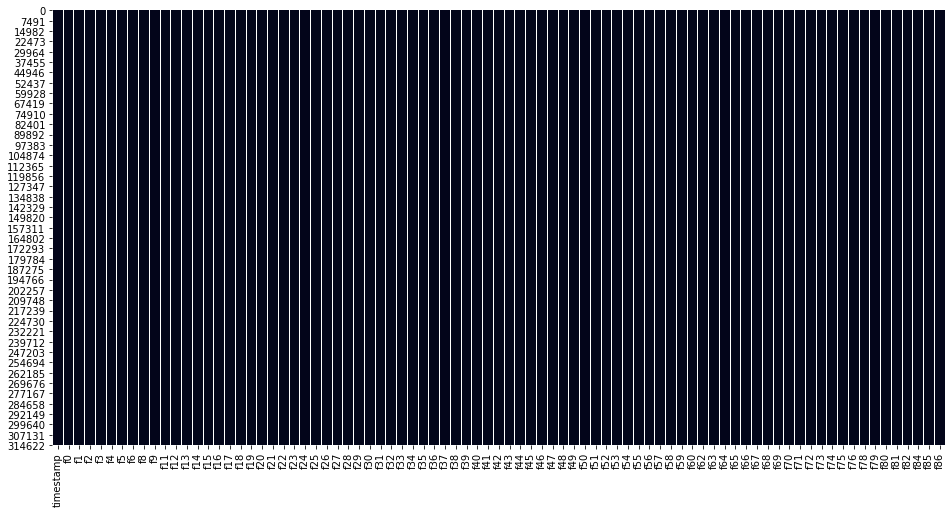

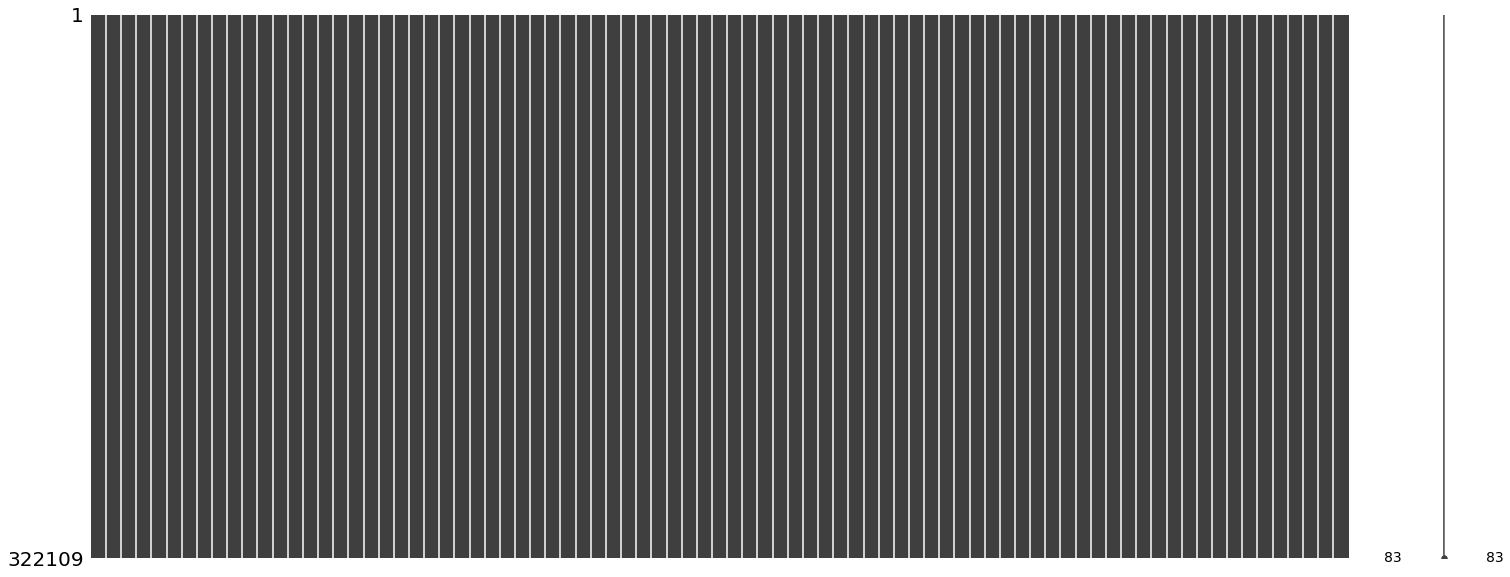

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(cleandata.isnull(),cbar=False)
msno.matrix(cleandata)

In [ ]:
## Basic Statistics

In [ ]:
stat_labels= labels.describe()
print("basic stat info of labels:",stat_labels)

statpredictors=cleandata.describe()
#print("basic stat info of predictors:",statpredictors)

stat_predictors=statpredictors.transpose()
stat_predictors


basic stat info of labels:           timestamp       label
count  5.070000e+02  507.000000
mean   1.437059e+09   57.695140
std    2.735773e+07   13.597250
min    1.368599e+09    3.503323
25%    1.418668e+09   49.463467
50%    1.436596e+09   57.215967
75%    1.452839e+09   65.402776
max    1.481096e+09   98.440000


,count,mean,std,min,25%,50%,75%,max
timestamp,322109.0,1.418285e+09,3.087459e+07,1.368230e+09,1.392392e+09,1.416550e+09,1.440708e+09,1.481119e+09
f0,322109.0,1.604054e-13,1.000002e+00,-5.847810e+00,2.040689e-01,2.040689e-01,2.040689e-01,1.638555e+00
f1,322109.0,-5.136952e-14,1.000002e+00,-4.718550e+00,-6.908715e-02,-6.908715e-02,-6.908715e-02,4.323841e+01
f2,322109.0,-2.162580e-15,1.000002e+00,-2.779197e+00,9.702713e-02,4.243366e-01,4.330506e-01,3.338310e+00
f3,322109.0,-2.141797e-14,1.000002e+00,-2.671973e+00,-3.235587e-01,1.661682e-01,5.496381e-01,4.374574e+00
...,...,...,...,...,...,...,...,...
f81,322109.0,2.667179e-10,1.000002e+00,-1.203821e+00,-1.019375e+00,9.716816e-01,9.716816e-01,9.716816e-01
f82,322109.0,-6.363003e-16,1.000002e+00,-5.494418e+00,-4.304584e-01,2.666564e-01,7.403612e-01,2.118032e+00
f84,322109.0,-1.936667e-13,1.000002e+00,-2.717707e+00,-9.474696e-01,4.475098e-02,5.974914e-01,5.505707e+00
f85,322109.0,-5.524664e-13,1.000002e+00,-4.127187e-01,-4.115170e-01,-4.113193e-01,-4.109970e-01,8.651650e+00


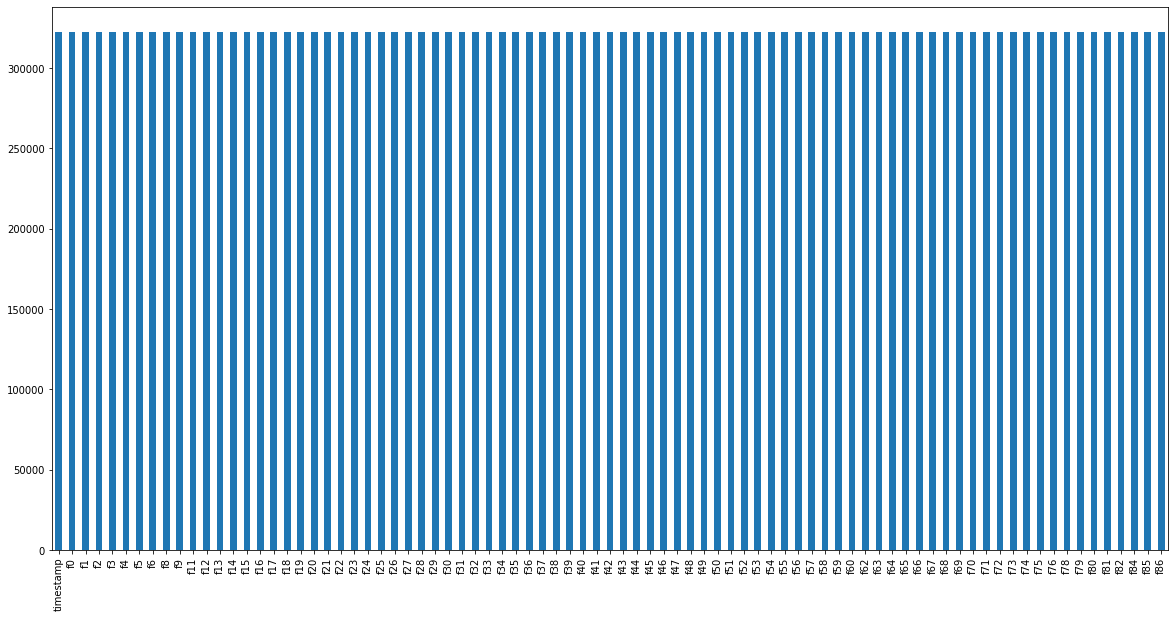

In [ ]:
stat_predictors['count'].plot(kind='bar',figsize=(20,10))

#plt.ticklabel_format(style='sci', scilimits=(-2,2))
plt.show()

## Regression Model

In [ ]:
#Building linear regresion to understand feature contributions 

target = feature_dataset['label']
input_data = feature_dataset.drop(['timestamp','label'], axis=1)

# selected_features = [
#     'f19',
#     'f36',
#     'f48',
#     'f49',
#     'f62',
#     'f67',
#     'f68',
#     'f76',
# ]

X = sm.add_constant(input_data)#[selected_features])

Y = target #np.log(target) ##Log transform target variable
model = sm.OLS(Y,X)
results = model.fit()

aa=results.summary()
print(aa)

C:\Users\hsain\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     5.335
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           7.46e-31
Time:                        17:31:54   Log-Likelihood:                -1847.4
No. Observations:                 503   AIC:                             3861.
Df Residuals:                     420   BIC:                             4211.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9171     20.582      0.530      0.5

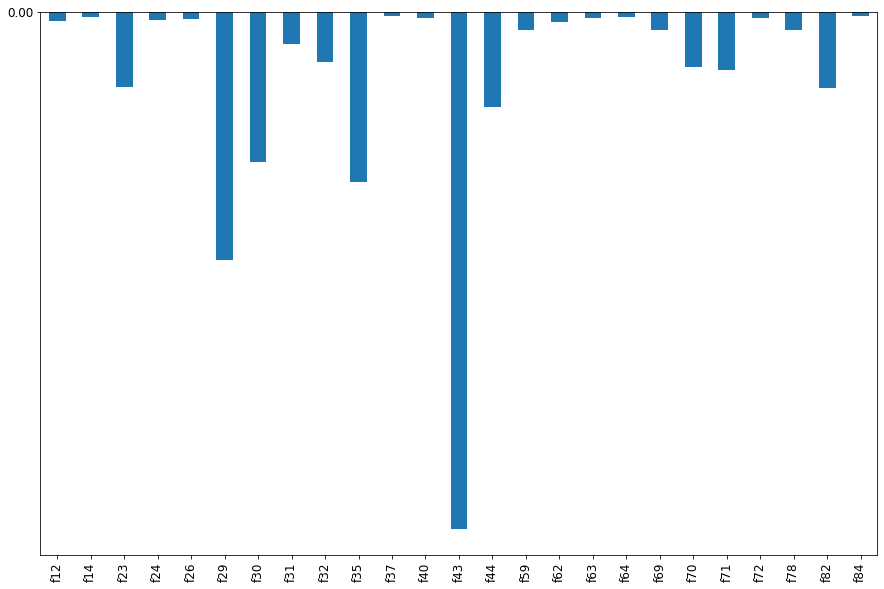

In [ ]:
aa=results.params
negativeparameters=aa[aa<-1]

plt.yticks(np.arange(0, 1, 0.01))
plt.xticks(np.arange(0, 1, 0.01))
negativeparameters.plot(kind='bar',linestyle='dashed', linewidth = 5,fontsize=12,figsize=(15,10))

#print('R2: ', results.rsquared)

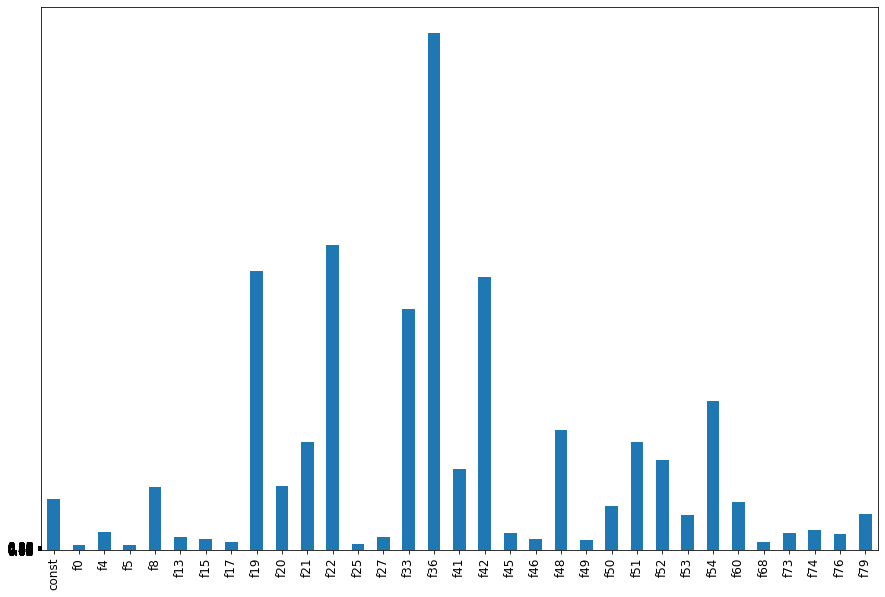

In [ ]:
aa=results.params
postiveparameters=aa[aa>=1]
plt.yticks(np.arange(0, 1, 0.01))
plt.xticks(np.arange(0, 1, 0.01))
postiveparameters.plot(kind='bar',linestyle='dashed', linewidth = 5,fontsize=12,figsize=(15,10))


f19    0.031929
f20    0.048640
f21    0.020101
f36    0.041277
f50    0.044554
f62    0.027878
f70    0.031928
f71    0.030231
f76    0.008735
dtype: float64


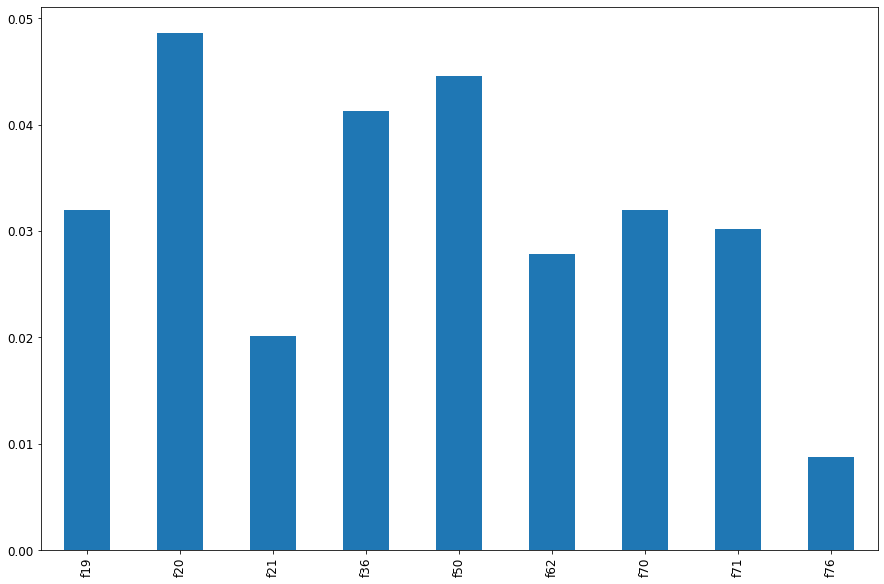

In [ ]:
aa=results.pvalues
significatvalue=aa[aa<=0.05]
print(significatvalue)
plt.yticks(np.arange(0, 1, 0.01))
plt.xticks(np.arange(0, 1, 0.01))
significatvalue.plot(kind='bar',linestyle='dashed', linewidth = 5,fontsize=12,figsize=(15,10))

## Machine Learning

In [ ]:
#ML Part goes here. Steps followed:
#splitting dataset into train and test dataset
#builidng a random forest regressor and comupting rmse for test dataset
#building another regression based model and computing rmse

In [ ]:
#splitting data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(input_data, target, test_size=0.30, random_state=42)

In [ ]:
## Dealing Multicollinearity-Ridge Regression and Lasso

## Ridge Reression

In [ ]:
from sklearn.linear_model import Ridge
RidgeReg=Ridge(alpha=0.5,normalize=True)
RidgeReg.fit(xtrain,ytrain)
predridge=RidgeReg.predict(xtest)
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(ytest,predridge))
print('Mean Squared Error: ',metrics.mean_squared_error(ytest,predridge))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,predridge)))


Mean Absolute Error:  8.287330295559302
Mean Squared Error:  112.1623632462183
Root Mean Squared Error:  10.590673408533487


In [ ]:
#predictors = xtrain.columns
#coef = pd.Series(lreg.coef_,predictors).sort_values()
#coef = pd.Series(model_lasso.coef_, index = xtrain.columns)
#coef.plot(kind='bar', title='Modal Coefficients')

## Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
lassoReg=Lasso(alpha=0.5,normalize=True)
lassoReg.fit(xtrain,ytrain)
predlasso=lassoReg.predict(xtest)
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(ytest,predlasso))
print('Mean Squared Error: ',metrics.mean_squared_error(ytest,predlasso))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,predlasso)))


Mean Absolute Error:  9.932408481173361
Mean Squared Error:  162.0733067682451
Root Mean Squared Error:  12.730801497480238


In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(xtrain, ytrain)
coef = pd.Series(model_lasso.coef_, index = xtrain.columns)
coef

C:\Users\hsain\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hsain\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7903.015200678914, tolerance: 4.746776219218087
  tol, rng, random, positive)
C:\Users\hsain\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8019.126250644481, tolerance: 4.746776219218087
  tol, rng, random, positive)
C:\Users\hsain\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

f0     1.444339
f1     0.003840
f2    -1.031789
f3    -0.458266
f4     0.766582
         ...   
f81    0.033169
f82    0.000000
f84   -1.659435
f85   -0.118372
f86   -0.429153
Length: 82, dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 43 variables and eliminated the other 39 variables


In [ ]:
selected_features=coef[coef != 0].index
#selected_features.index
selected_features

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f6', 'f15', 'f16', 'f17', 'f18', 'f20',
       'f23', 'f24', 'f26', 'f28', 'f34', 'f36', 'f37', 'f39', 'f47', 'f49',
       'f54', 'f55', 'f56', 'f57', 'f60', 'f62', 'f63', 'f64', 'f66', 'f68',
       'f69', 'f70', 'f72', 'f73', 'f75', 'f76', 'f79', 'f80', 'f81', 'f84',
       'f85', 'f86'],
      dtype='object')

In [ ]:
feature_dataset[['f0','f1']]

,f0,f1
0,0.204069,-0.069087
1,0.204069,-0.069087
2,0.204069,-0.069087
3,0.204069,-0.069087
4,0.204069,-0.069087
...,...,...
498,-1.021622,0.166458
499,-0.917423,0.023597
500,-0.313374,0.866344
501,-1.246774,-4.189752


In [ ]:

lassoselected_features=feature_dataset[selected_features]
lassoselected_features

,f0,f1,f2,f3,f4,f6,f15,f16,f17,f18,...,f72,f73,f75,f76,f79,f80,f81,f84,f85,f86
0,0.204069,-0.069087,-0.865418,0.897000,0.881606,-0.292274,-0.137728,0.166332,-0.125859,-0.009933,...,-1.579487,-1.317868,-1.240028,-1.439707,-0.508738,-1.447563,-1.201004,-0.860921,-0.411319,-0.002696
1,0.204069,-0.069087,0.400160,-0.696550,0.847983,-0.303200,-0.496151,0.372315,-0.372070,-0.004151,...,-1.513428,-1.299893,-0.955680,-0.625287,-0.161381,-0.513902,-1.196386,-0.984022,-0.411319,-0.002696
2,0.204069,-0.069087,0.421598,0.203181,0.839021,-0.205212,-0.519801,0.333735,-0.120908,-0.004654,...,-1.421140,-1.346196,-0.664120,-0.527593,0.123193,-0.375179,-1.191769,-0.968784,-0.411319,-0.002696
3,0.204069,-0.069087,0.437323,-0.268837,0.825693,-0.305601,-0.678915,0.378222,-0.114633,-0.013658,...,-1.582549,-1.436408,-0.954802,-0.684908,0.414191,-0.695233,-1.187151,-1.063894,-0.411319,-0.002696
4,0.204069,-0.069087,0.419768,1.708143,0.863245,-0.431043,-0.386796,0.301678,-0.115204,-0.033792,...,-1.601652,-1.534232,-0.530101,-0.338620,0.711413,-1.781468,-1.182534,-1.104688,-0.411319,-0.002696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-1.021622,0.166458,-0.533470,1.354526,1.075703,0.152923,0.907741,-0.392758,-0.327415,-0.026671,...,0.704493,1.507599,0.125555,0.572628,-2.109723,0.717973,0.971682,0.381668,-0.412239,-2.031560
499,-0.917423,0.023597,-0.518830,0.873988,1.031255,0.282982,0.483016,-0.399218,1.079116,-0.034909,...,0.686777,1.566736,0.089521,0.803552,-2.035402,0.624545,0.971682,0.626120,-0.412184,-1.798790
500,-0.313374,0.866344,-0.520149,1.746362,1.080708,0.102089,0.940486,-0.272505,-0.106644,-0.029851,...,0.514237,1.611850,-0.663284,0.416616,-1.825299,0.692879,0.971682,1.677341,-0.411893,-0.943356
501,-1.246774,-4.189752,-0.540696,1.181604,1.055642,-0.125812,0.724803,-0.318914,-0.127977,-0.024824,...,0.423510,1.698105,-0.169682,0.715741,-1.918331,0.872713,0.971682,0.482864,-0.411277,1.733463


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

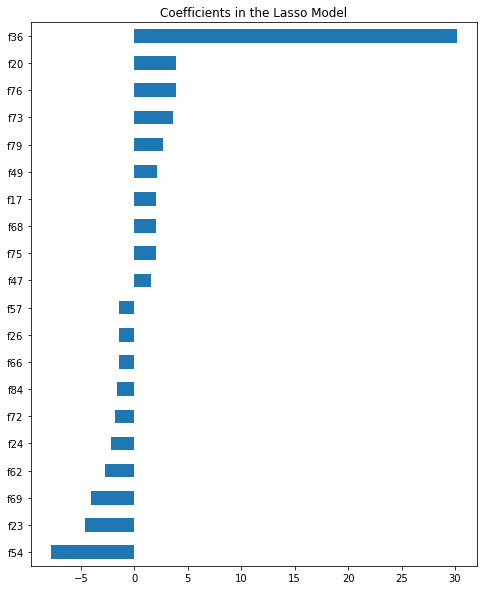

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


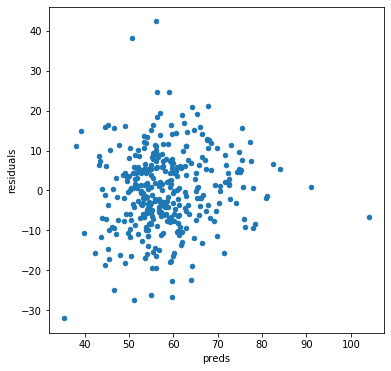

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":model_lasso.predict(xtrain), "true":ytrain})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [ ]:
coef

f0     1.444339
f1     0.003840
f2    -1.031789
f3    -0.458266
f4     0.766582
         ...   
f81    0.033169
f82    0.000000
f84   -1.659435
f85   -0.118372
f86   -0.429153
Length: 82, dtype: float64

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(xtrain,ytrain)

pred_cv = ENreg.predict(xtest)

ENreg.score(xtest,ytest)
print('Mean Absolute Error: ',metrics.mean_absolute_error(ytest,pred_cv))
print('Mean Squared Error: ',metrics.mean_squared_error(ytest,pred_cv))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,pred_cv)))



Mean Absolute Error:  9.216436086805265
Mean Squared Error:  136.59447294349332
Root Mean Squared Error:  11.687363814970993


In [ ]:
ENreg.score(xtest,ytest)

0.13799603410664096

## Random forest regressor 

In [ ]:
import time
timebeforetraining=time.time()
rf = RandomForestRegressor(max_depth=2, n_estimators = 1000, random_state = 42)
rf.fit(xtrain, ytrain)
timeaftertraining=time.time()
timedifference=timebeforetraining-timeaftertraining
print(timedifference)
# Use the forest's predict method on the test data
rf_predictions = rf.predict(xtest)

# Calculate the absolute errors
rf_errors = abs(rf_predictions - ytest)

print('\nMean Absolute Error Linear regression:', round(np.mean(rf_errors), 2), 'degrees.')

print('RMSE error Linear regression :', mean_squared_error(ytest, rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,rf_predictions)))


-6.941997528076172

Mean Absolute Error Linear regression: 8.46 degrees.
RMSE error Linear regression : 119.6942881317751
Root Mean Squared Error:  10.940488477749753


In [ ]:
rf.feature_importances_

array([5.06591610e-02, 9.60067682e-04, 4.76166064e-02, 1.60085913e-03,
       1.34362303e-04, 5.83309852e-03, 1.02752666e-02, 3.68876357e-04,
       5.19829529e-03, 2.44499406e-04, 0.00000000e+00, 1.28615445e-03,
       6.58345531e-05, 2.32633528e-02, 7.52266050e-02, 5.64632829e-02,
       1.90833125e-03, 1.04401775e-03, 6.70796560e-03, 2.65395595e-03,
       0.00000000e+00, 2.71391032e-03, 9.64051019e-04, 6.14010815e-04,
       0.00000000e+00, 3.22656600e-03, 6.33306113e-04, 3.98133230e-03,
       4.84100180e-04, 6.63120076e-03, 2.73968205e-04, 1.37022645e-03,
       7.23981775e-04, 2.42498082e-04, 3.98828995e-01, 1.82858820e-02,
       2.07534568e-04, 1.95793933e-02, 9.85393725e-04, 2.32973487e-04,
       2.38784092e-03, 4.05219120e-03, 2.58510318e-03, 4.28744650e-04,
       4.88739170e-03, 2.75417615e-04, 3.68604648e-03, 2.98630848e-03,
       6.55167808e-04, 5.30798761e-03, 2.19687840e-03, 9.08129588e-03,
       2.15623920e-03, 7.07754562e-03, 7.06878075e-03, 8.00928528e-03,
      

## decision tree regression

In [ ]:

import time
timebeforetraining=time.time()
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(xtrain, ytrain)
timeaftertraining=time.time()
timedifference=timebeforetraining-timeaftertraining
print(timedifference)
# Use the forest's predict method on the test data
regr_predictions = regr.predict(xtest)

# Calculate the absolute errors
regr_errors = abs(regr_predictions - ytest)

# Print out the mean absolute error (mae)
print('\nMean Absolute Error Linear regression:', round(np.mean(regr_errors), 2), 'degrees.')

print('RMSE error Linear regression :', mean_squared_error(ytest, regr_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,regr_predictions)))

-0.00827169418334961

Mean Absolute Error Linear regression: 9.18 degrees.
RMSE error Linear regression : 140.25473027972595
Root Mean Squared Error:  11.842918993209654


## Gradient boosting regressor

In [ ]:

import time
timebeforetraining=time.time()
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
timeaftertraining=time.time()
timedifference=timebeforetraining-timeaftertraining
print(timedifference)
clf_predictions = clf.predict(xtest)

# Calculate the absolute errors
clf_errors = abs(clf_predictions - ytest)

# Print out the mean absolute error (mae)
print('\nMean Absolute Gradient Boosted :', round(np.mean(clf_errors), 2), 'degrees.')

print("RMSE error Gradient Boosted : %.4f" % mean_squared_error(ytest, clf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,clf_predictions)))

-2.166677951812744

Mean Absolute Gradient Boosted : 7.83 degrees.
RMSE error Gradient Boosted : 101.1698
Root Mean Squared Error:  10.05831849270762


In [ ]:
lassoselected_features

,f0,f1,f2,f3,f4,f6,f15,f16,f17,f18,...,f72,f73,f75,f76,f79,f80,f81,f84,f85,f86
0,0.204069,-0.069087,-0.865418,0.897000,0.881606,-0.292274,-0.137728,0.166332,-0.125859,-0.009933,...,-1.579487,-1.317868,-1.240028,-1.439707,-0.508738,-1.447563,-1.201004,-0.860921,-0.411319,-0.002696
1,0.204069,-0.069087,0.400160,-0.696550,0.847983,-0.303200,-0.496151,0.372315,-0.372070,-0.004151,...,-1.513428,-1.299893,-0.955680,-0.625287,-0.161381,-0.513902,-1.196386,-0.984022,-0.411319,-0.002696
2,0.204069,-0.069087,0.421598,0.203181,0.839021,-0.205212,-0.519801,0.333735,-0.120908,-0.004654,...,-1.421140,-1.346196,-0.664120,-0.527593,0.123193,-0.375179,-1.191769,-0.968784,-0.411319,-0.002696
3,0.204069,-0.069087,0.437323,-0.268837,0.825693,-0.305601,-0.678915,0.378222,-0.114633,-0.013658,...,-1.582549,-1.436408,-0.954802,-0.684908,0.414191,-0.695233,-1.187151,-1.063894,-0.411319,-0.002696
4,0.204069,-0.069087,0.419768,1.708143,0.863245,-0.431043,-0.386796,0.301678,-0.115204,-0.033792,...,-1.601652,-1.534232,-0.530101,-0.338620,0.711413,-1.781468,-1.182534,-1.104688,-0.411319,-0.002696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-1.021622,0.166458,-0.533470,1.354526,1.075703,0.152923,0.907741,-0.392758,-0.327415,-0.026671,...,0.704493,1.507599,0.125555,0.572628,-2.109723,0.717973,0.971682,0.381668,-0.412239,-2.031560
499,-0.917423,0.023597,-0.518830,0.873988,1.031255,0.282982,0.483016,-0.399218,1.079116,-0.034909,...,0.686777,1.566736,0.089521,0.803552,-2.035402,0.624545,0.971682,0.626120,-0.412184,-1.798790
500,-0.313374,0.866344,-0.520149,1.746362,1.080708,0.102089,0.940486,-0.272505,-0.106644,-0.029851,...,0.514237,1.611850,-0.663284,0.416616,-1.825299,0.692879,0.971682,1.677341,-0.411893,-0.943356
501,-1.246774,-4.189752,-0.540696,1.181604,1.055642,-0.125812,0.724803,-0.318914,-0.127977,-0.024824,...,0.423510,1.698105,-0.169682,0.715741,-1.918331,0.872713,0.971682,0.482864,-0.411277,1.733463


In [ ]:
target = feature_dataset['label']
input_data = lassoselected_features
xtrain, xtest, ytrain, ytest = train_test_split(input_data, target, test_size=0.30, random_state=42)

In [ ]:

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
timeaftertraining=time.time()
timedifference=timebeforetraining-timeaftertraining
print(timedifference)
clf_predictions = clf.predict(xtest)

# Calculate the absolute errors
clf_errors = abs(clf_predictions - ytest)

# Print out the mean absolute error (mae)
print('\nMean Absolute Gradient Boosted :', round(np.mean(clf_errors), 2), 'degrees.')

print("RMSE error Gradient Boosted : %.4f" % mean_squared_error(ytest, clf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,clf_predictions)))

-3.9070653915405273

Mean Absolute Gradient Boosted : 7.66 degrees.
RMSE error Gradient Boosted : 101.2531
Root Mean Squared Error:  10.062458419971385


## Filter columns by correlation

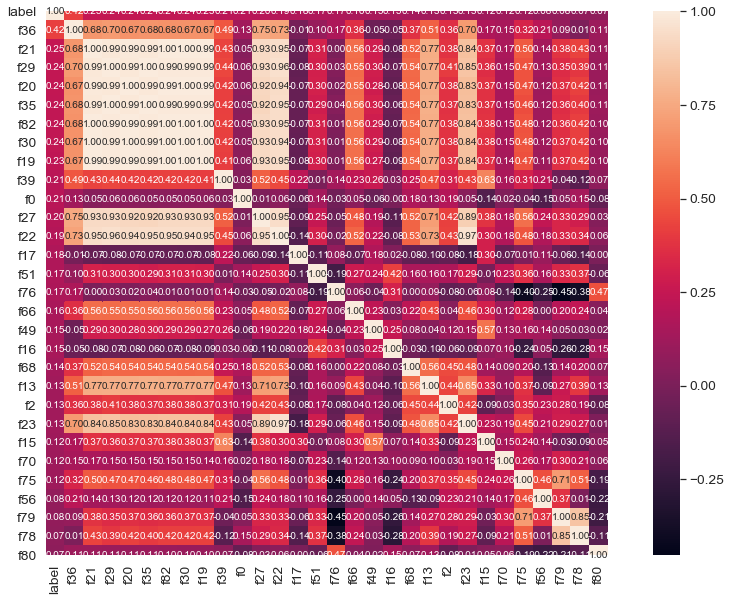

In [ ]:
#saleprice correlation matrix
k = 30 #number of variables for heatmap
plt.figure(figsize=(16,10))
corrmat = feature_dataset.corr()
# picking the top 10 correlated features
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(feature_dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols

Index(['label', 'f36', 'f21', 'f29', 'f20', 'f35', 'f82', 'f30', 'f19', 'f39',
       'f0', 'f27', 'f22', 'f17', 'f51', 'f76', 'f66', 'f49', 'f16', 'f68',
       'f13', 'f2', 'f23', 'f15', 'f70', 'f75', 'f56', 'f79', 'f78', 'f80'],
      dtype='object')

In [ ]:
corr_features=feature_dataset[cols]
corr_features

,label,f36,f21,f29,f20,f35,f82,f30,f19,f39,...,f13,f2,f23,f15,f70,f75,f56,f79,f78,f80
0,49.744664,-0.014605,-1.053549,-0.219833,-0.975095,-0.069358,-0.982621,-1.002082,-0.858304,-0.761892,...,-0.691035,-0.865418,0.418612,-0.137728,1.773833,-1.240028,1.359226,-0.508738,-0.202152,-1.447563
1,52.428068,0.225565,-0.256438,0.139524,-0.187963,0.193628,-0.192965,-0.182177,-0.112882,-0.811310,...,0.514164,0.400160,0.866023,-0.496151,1.758584,-0.955680,0.577277,-0.161381,0.098538,-0.513902
2,67.154640,0.239422,0.232134,0.334539,0.268304,0.332000,0.262066,0.271194,0.300709,-0.197274,...,0.110018,0.421598,1.122825,-0.519801,1.737680,-0.664120,1.669270,0.123193,0.313478,-0.375179
3,40.521581,0.054410,-0.793702,-0.087883,-0.681177,0.026843,-0.699682,-0.692166,-0.574171,-0.380905,...,-0.093263,0.437323,0.670285,-0.678915,1.755685,-0.954802,0.982318,0.414191,0.396439,-0.695233
4,63.614351,0.298388,0.232719,0.343697,0.322992,0.351291,0.312800,0.324854,0.325411,-0.085114,...,0.034103,0.419768,0.927088,-0.386796,1.685269,-0.530101,0.723043,0.711413,0.671892,-1.781468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,53.160000,0.461417,0.737846,0.496110,0.769091,0.445107,0.761406,0.762363,0.752419,1.000713,...,0.846673,-0.533470,0.626237,0.907741,-0.576210,0.125555,-1.467092,-2.109723,-0.130851,0.717973
499,53.939999,0.483399,0.762041,0.513129,0.812049,0.457847,0.804268,0.805030,0.775342,1.013529,...,1.020619,-0.518830,0.554075,0.483016,-0.576201,0.089521,-1.353981,-2.035402,-0.009067,0.624545
500,67.560001,0.160582,0.767262,0.512099,0.713352,0.477244,0.702646,0.701534,0.708182,-0.231914,...,0.551993,-0.520149,0.285150,0.940486,-0.576124,-0.663284,-1.481956,-1.825299,-0.256923,0.692879
501,62.160000,0.468731,0.677152,0.501663,0.728701,0.435709,0.725047,0.711163,0.716458,0.818951,...,0.813416,-0.540696,0.660376,0.724803,-0.576497,-0.169682,-1.537833,-1.918331,-0.127517,0.872713


In [ ]:
target = feature_dataset['label']
input_data =corr_features .drop(['label'], axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(input_data, target, test_size=0.30, random_state=42)

In [ ]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(xtrain, ytrain)
timeaftertraining=time.time()
timedifference=timebeforetraining-timeaftertraining
print(timedifference)
clf_predictions = clf.predict(xtest)

# Calculate the absolute errors
clf_errors = abs(clf_predictions - ytest)

# Print out the mean absolute error (mae)
print('\nMean Absolute Gradient Boosted :', round(np.mean(clf_errors), 2), 'degrees.')

print("RMSE error Gradient Boosted : %.4f" % mean_squared_error(ytest, clf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(ytest,clf_predictions)))

-13.505062341690063

Mean Absolute Gradient Boosted : 8.02 degrees.
RMSE error Gradient Boosted : 109.6970
Root Mean Squared Error:  10.473634516583353


In [ ]:
cor_target=abs(correlation['label'])
relevantfeatures=cor_target[cor_target>0.2]
relevantfeatures


timestamp    0.216247
f0           0.211201
f19          0.228621
f20          0.240221
f21          0.247892
f27          0.202639
f29          0.244522
f30          0.235525
f35          0.238769
f36          0.418551
f39          0.211861
f57          0.222098
f82          0.236233
label        1.000000
Name: label, dtype: float64